In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
core_data = pd.read_csv("data/freeman_3_pp.csv", na_values=' ')

In [3]:
core_data.head()

,well,form,sample,core,orient,depth,log depth,tvdss,rho_g,fluid,...,intercept,por_insitu,porden,Unnamed: 32,air slope,ka_insitu,brine slope,kb_insitu,Unnamed: 37,shaly?
0,Freeman-3,702,1,3,NaN,10211.90,10222.90,9317.37,2.65,oil,...,10.93,1079.78,32.08,NaN,-1.180,5365,-1.305,4545,NaN,NaN
1,Freeman-3,702,2,3,NaN,10212.60,10223.60,9317.93,2.64,oil,...,4.11,1443.36,33.04,NaN,-1.075,5819,-1.085,4882,NaN,NaN
2,Freeman-3,702,3,3,NaN,10213.50,10224.50,9318.48,2.65,oil,...,0.00,1717.20,32.77,NaN,-1.700,6071,-2.190,4689,NaN,NaN
3,Freeman-3,702,4,3,NaN,10214.55,10225.55,9319.04,2.64,oil,...,13.56,944.88,31.87,NaN,-0.995,4306,-0.715,2907,NaN,NaN
4,Freeman-3,702,5,3,NaN,10215.30,10226.30,9319.32,2.64,oil,...,-8.35,2133.45,33.20,NaN,-1.100,4851,-0.715,2717,NaN,NaN


<AxesSubplot:xlabel='por_1000', ylabel='ka_1000'>

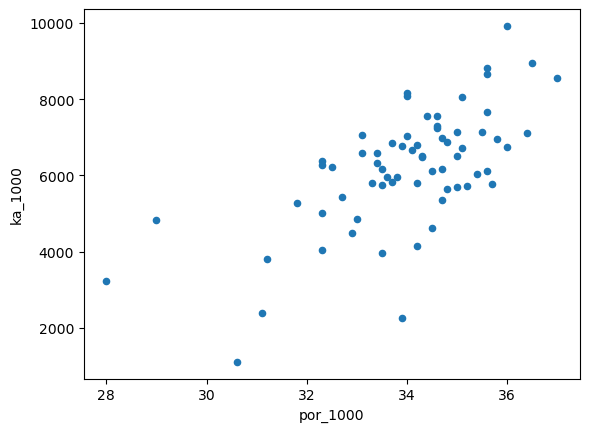

In [4]:
core_data.plot(kind="scatter", x="por_1000", y="ka_1000")

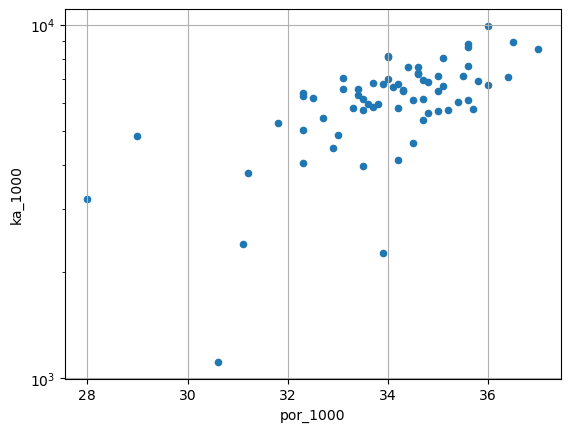

In [5]:
core_data.plot(kind="scatter", x="por_1000", y="ka_1000")
plt.yscale('log')
plt.grid(True)

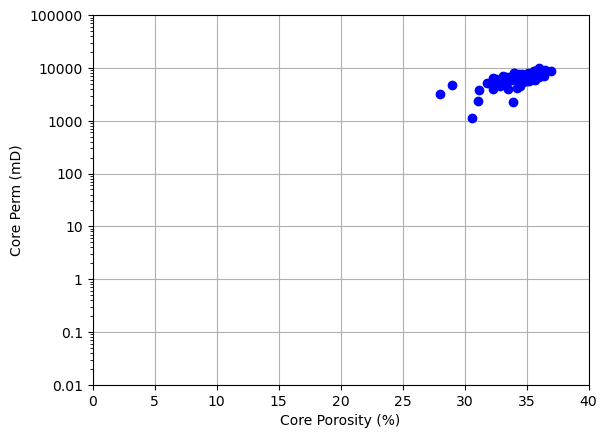

In [6]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()

ax.axis([0, 40, 0.01, 100000])
ax.plot(core_data['por_1000'], core_data['ka_1000'], 'bo')
ax.set_yscale('log')
ax.grid(True)
ax.set_ylabel('Core Perm (mD)')
ax.set_xlabel('Core Porosity (%)')

#Format the axes so that they show whole numbers
for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)
    
plt.savefig('11-xplot-semi-log-fixed.png', dpi=300)

In [7]:
poro_perm = core_data[['por_1000', 'ka_1000']].copy()

In [8]:
poro_perm.dropna(inplace=True)

In [9]:
poro_perm_polyfit = np.polyfit(poro_perm['por_1000'], np.log10(poro_perm['ka_1000']), 1)

In [10]:
poro_perm_polyfit

array([0.05651734, 1.85135992])

In [11]:
import statsmodels.api as sm

x = core_data['por_1000']
x = sm.add_constant(x)
y = np.log10(core_data['ka_1000'])

In [12]:
x.head()

,const,por_1000
0,1.0,32.5
1,1.0,33.1
2,1.0,34.6
3,1.0,32.3
4,1.0,34.8


In [13]:
model = sm.OLS(y, x, missing='drop')
results = model.fit()

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ka_1000   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     41.44
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.69e-08
Time:                        21:06:38   Log-Likelihood:                 49.898
No. Observations:                  67   AIC:                            -95.80
Df Residuals:                      65   BIC:                            -91.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8514      0.299      6.199      0.000       1.255       2.448
por_1000       0.0565      0.009      6.438      0.000       0.039       0.074
==============================================================================
Omnibus:                       49.653   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.719
Skew:                          -2.201   Prob(JB):                     2.60e-44
Kurtosis:                      10.247   Cond. No.                         714.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
results.params

const       1.851360
por_1000    0.056517
dtype: float64

In [16]:
results.params[1]

0.05651734351048546

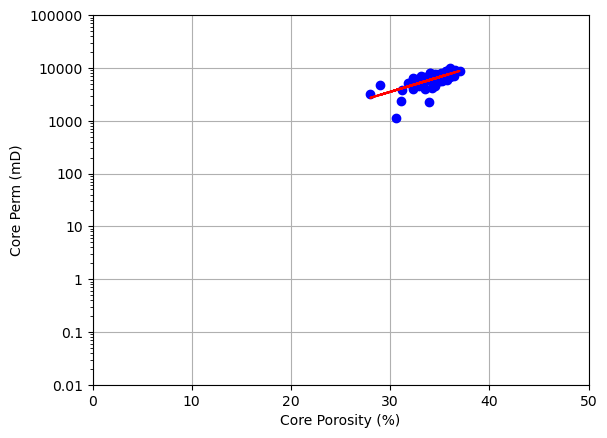

In [17]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()

ax.axis([0, 50, 0.01, 100000])
ax.semilogy(core_data['por_1000'], core_data['ka_1000'], 'bo')

ax.grid(True)
ax.set_ylabel('Core Perm (mD)')
ax.set_xlabel('Core Porosity (%)')

ax.semilogy(core_data['por_1000'], 10**(results.params[1] * core_data['por_1000'] + results.params[0]), 'r-')

#Format the axes so that they show whole numbers
for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)
    
# plt.savefig('predicted_poro_perm_xplot.png', dpi=100)

In [18]:
import lasio
las = lasio.read('data/Freeman_003ST1.las')
well1 = las.df()
well = well1.reset_index()

In [19]:
from class2 import Petrophysics

In [20]:
test = Petrophysics(well)

In [21]:
x = test.density_porosity(1, 2.65, 1.1)

In [22]:
well.head()

,DEPT,DEN,DT,GR,NEU,RES_DEP,PHI
0,5633.5,NaN,NaN,12.1597,NaN,NaN,NaN
1,5634.0,NaN,NaN,44.0750,NaN,NaN,NaN
2,5634.5,NaN,NaN,44.0750,NaN,NaN,NaN
3,5635.0,NaN,NaN,44.0750,NaN,NaN,NaN
4,5635.5,NaN,NaN,43.7159,NaN,NaN,NaN


In [23]:
well['PERM']= 10**(results.params[1] * (well['PHI']*100) + results.params[0])

In [24]:
well.head()

,DEPT,DEN,DT,GR,NEU,RES_DEP,PHI,PERM
0,5633.5,NaN,NaN,12.1597,NaN,NaN,NaN,NaN
1,5634.0,NaN,NaN,44.0750,NaN,NaN,NaN,NaN
2,5634.5,NaN,NaN,44.0750,NaN,NaN,NaN,NaN
3,5635.0,NaN,NaN,44.0750,NaN,NaN,NaN,NaN
4,5635.5,NaN,NaN,43.7159,NaN,NaN,NaN,NaN


In [25]:
well.to_csv('data/freeman_well_3_perm.csv', index=False)

In [ ]:
fig, ax = plt.subplots(figsize=(5,10))
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan = 1, sharey = ax1)

# Porosity track
ax1.plot(core_data["por_1000"]/100, core_data['depth'], color = "black", marker='.', linewidth=0)
ax1.plot(well['PHI'], well['DEPT'], color ='blue', linewidth=0.5)
ax1.set_xlabel("Porosity")
ax1.set_xlim(0.5, 0)
ax1.xaxis.label.set_color("black")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
ax1.set_xticks([0.5,  0.25, 0])

# Permeability track
ax2.plot(core_data["ka_1000"], core_data['depth'], color = "black", marker='.', linewidth=0)
ax2.plot(well['PERM'], well['DEPT'], color ='blue', linewidth=0.5)
ax2.set_xlabel("Permeability")
ax2.set_xlim(0.1, 100000)
ax2.xaxis.label.set_color("black")
ax2.tick_params(axis='x', colors="black")
ax2.spines["top"].set_edgecolor("black")
ax2.set_xticks([0.01, 1, 10, 100, 10000])
ax2.semilogx()

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2]:
    ax.set_ylim(9025, 8225)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    
# Removes the y axis labels on the second track
for ax in [ax2]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
plt.tight_layout()
fig.subplots_adjust(wspace = 0.3)
# plt.savefig('final_track_plot.png', dpi=100)

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,8), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,8), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((1,8), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,8), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron track
# ax6 = plt.subplot2grid((1,8), (0,4), rowspan=1, colspan = 1, sharey = ax1)
ax7 = ax2.twiny()
ax8 = plt.subplot2grid((1,8), (0,4), rowspan=1, colspan = 1, sharey = ax1)
ax9 = plt.subplot2grid((1,8), (0,5), rowspan=1, colspan = 1, sharey = ax1)

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
# ax14 = ax6.twiny()
# ax14.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot(well["GR"], well['DEPT'], color = "green", linewidth = 0.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Resistivity track
ax2.plot(well["RES_DEP"], well['DEPT'], color = "red", linewidth = 0.5)
ax2.set_xlabel("Resistivity - Deep")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Density track
ax3.plot(well["DEN"], well['DEPT'], color = "red", linewidth = 0.5)
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

# Sonic track
ax4.plot(well["DT"], well['DEPT'], color = "purple", linewidth = 0.5)
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax5.plot(well["NEUT"], well['DEPT'], color = "blue", linewidth = 0.5)
ax5.set_xlabel('Neutron')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.45, -0.15)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.45,  0.15, -0.15])

# Caliper track
# ax6.plot(well["CALI"], well['DEPTH'], color = "black", linewidth = 0.5)
# ax6.set_xlabel("Caliper")
# ax6.set_xlim(6, 16)
# ax6.xaxis.label.set_color("black")
# ax6.tick_params(axis='x', colors="black")
# ax6.spines["top"].set_edgecolor("black")
# ax6.fill_betweenx(well['DEPTH'], 8.5, well["CALI"], facecolor='yellow')
# ax6.set_xticks([6,  11, 16])

# Resistivity track - Curve 2
# ax7.plot(well["RMED"], well['DEPTH'], color = "green", linewidth = 0.5)
# ax7.set_xlabel("Resistivity - Med")
# ax7.set_xlim(0.2, 2000)
# ax7.xaxis.label.set_color("green")
# ax7.spines["top"].set_position(("axes", 1.08))
# ax7.spines["top"].set_visible(True)
# ax7.tick_params(axis='x', colors="green")
# ax7.spines["top"].set_edgecolor("green")
# ax7.set_xticks([0.1, 1, 10, 100, 1000])
# ax7.semilogx()

# Porosity track
ax8.plot(core_data["por_1000"]/100, core_data['depth'], color = "black", marker='.', linewidth=0)
ax8.plot(well['PHI'], well['DEPT'], color ='blue', linewidth=0.5)
ax8.set_xlabel("Porosity")
ax8.set_xlim(0.5, 0)
ax8.xaxis.label.set_color("black")
ax8.tick_params(axis='x', colors="black")
ax8.spines["top"].set_edgecolor("black")
ax8.set_xticks([0.5,  0.25, 0])

# Permeability track
ax9.plot(core_data["ka_1000"], core_data['depth'], color = "black", marker='.', linewidth=0)
ax9.plot(well['PERM'], well['DEPT'], color ='blue', linewidth=0.5)
ax9.set_xlabel("Permeability")
ax9.set_xlim(0.1, 100000)
ax9.xaxis.label.set_color("black")
ax9.tick_params(axis='x', colors="black")
ax9.spines["top"].set_edgecolor("black")
ax9.set_xticks([0.01, 1, 10, 100, 10000])
ax9.semilogx()

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax4, ax8, ax9]:
    ax.set_ylim(11400, 7700)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
for ax in [ax2, ax3, ax4, ax8, ax9]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
plt.tight_layout()
fig.subplots_adjust(wspace = 0.15)